# <font color=darkblue>Lab 26 - Correlation</font>



In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Jonah_laptop
jonah_laptop\jonah
C:\Users\JONAH\anaconda3\python.exe
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)


## Full name: Jonah Jordan
## R#: 11886590
## Title of the notebook: lab 26
## Date: 11/15
___

### Correlation 

**Old Faithful is a geyser in Yellowstone National Park in the central United States. It is famous for erupting on a fairly regular schedule. You can see a video of the eruption by running the cell below.** 

**Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.**

**If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it happens.  In this exercise, you will use a dataset on eruption durations and waiting times to see if you can make predictions on the waiting times accurately with linear regression.**

**The file `faithful.csv` has one row for each observed eruption.  It includes the following columns:**
- **`duration`: Eruption duration, in minutes**
- **`wait`: Time between this eruption and the next, also in minutes**

**Specific tasks for this exercise are given below.**

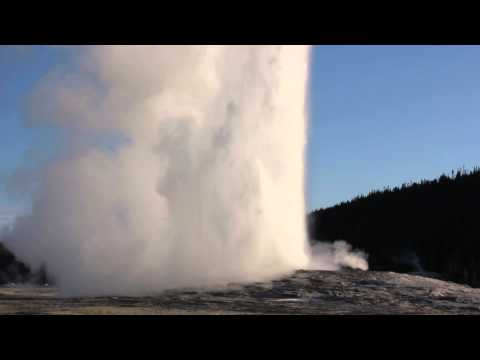

In [2]:
# For the curious: This is how to display a YouTube video in a Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the video.  For example, the full URL for this video is:
# https://www.youtube.com/watch?v=wE8NDuzt8eg

from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

**Task-1:** Read the **`faithful.csv`** file and store it in a variable named **`geyser`**. Display the first 5 rows of the dataframe **`geyser`**.

In [3]:
#GIVE YOUR ANSWER FOR TASK-1 IN THIS CELL
import pandas as pd
file_path = 'faithful.csv'

# Read
geyser = pd.read_csv(file_path)

#first 5 rows
print(geyser.head())


   duration  wait
0     3.600  79.0
1     1.800  54.0
2     3.333  74.0
3     2.283  62.0
4     4.533  85.0


**Task-2:** Make a scatter plot of the data that is in original units. It is conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis. Also, the plot must display appropriate x-label, y-label, and title. 

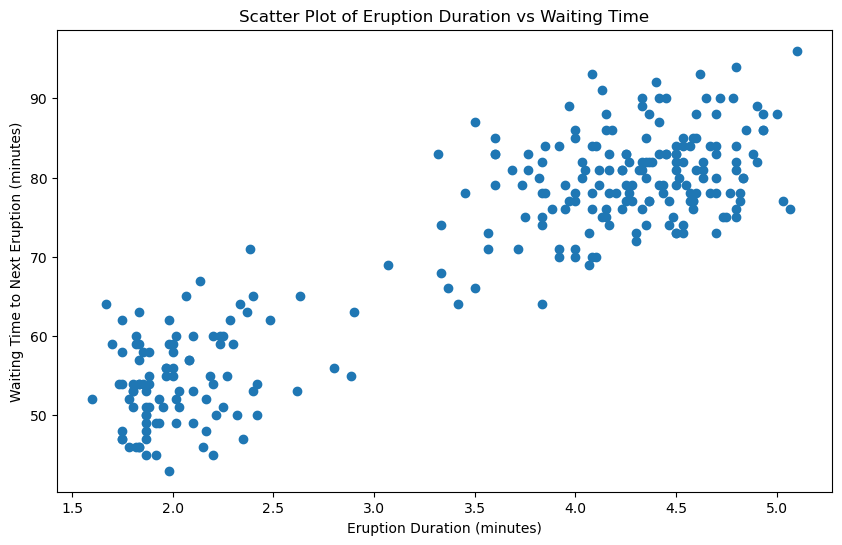

In [5]:
#GIVE YOUR ANSWER FOR TASK-2 IN THIS CELL
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
geyser = pd.read_csv('faithful.csv')

# Assuming the 'duration' column is on the horizontal axis and 'wait' column is on the vertical axis
x_column = 'duration'
y_column = 'wait'

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(geyser[x_column], geyser[y_column])

# Adding labels and title
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time to Next Eruption (minutes)')
plt.title('Scatter Plot of Eruption Duration vs Waiting Time')

# Display the plot
plt.show()

**Task-3:** Compute the mean and standard deviation of the eruption durations and store it in variables named **`duration_mean`** and **`duration_std`**, respectively. Similarly, compute the mean and standard deviation of the waiting times and store it in variables named **`wait_mean`** and **`wait_std`**, respectively. Print **`duration_mean`**, **`duration_std`**, **`wait_mean`**, and **`wait_std`** to the output.   

In [6]:
#GIVE YOUR ANSWER FOR TASK-3 IN THIS CELL

geyser = pd.read_csv('faithful.csv')

# eruption durations
duration_mean = np.mean(geyser['duration'])
duration_std = np.std(geyser['duration'])

# waiting times
wait_mean = np.mean(geyser['wait'])
wait_std = np.std(geyser['wait'])

#results
print(f"Eruption Duration Mean: {duration_mean:.2f}")
print(f"Eruption Duration Standard Deviation: {duration_std:.2f}")
print(f"Waiting Time Mean: {wait_mean:.2f}")
print(f"Waiting Time Standard Deviation: {wait_std:.2f}")

Eruption Duration Mean: 3.49
Eruption Duration Standard Deviation: 1.14
Waiting Time Mean: 70.90
Waiting Time Standard Deviation: 13.57


**Task-4:** Compute the eruption duration in standard units and append it as a new column named **`duration (standard units)`** to the dataframe **`geyser`**. Also, compute the waiting times in standard units and append it as a new column named **`wait (standard units)`** to the dataframe **`geyser`**. After appending the 2 new columns successfully, print the first 5 rows of the dataframe **`geyser`** to the output. 

In [7]:
#GIVE YOUR ANSWER FOR TASK-4 IN THIS CELL
geyser = pd.read_csv('faithful.csv')

#eruption durations
duration_mean = geyser['duration'].mean()
duration_std = geyser['duration'].std()
geyser['duration (standard units)'] = (geyser['duration'] - duration_mean) / duration_std

#waiting times
wait_mean = geyser['wait'].mean()
wait_std = geyser['wait'].std()
geyser['wait (standard units)'] = (geyser['wait'] - wait_mean) / wait_std


print(geyser.head())


   duration  wait  duration (standard units)  wait (standard units)
0     3.600  79.0                   0.098318               0.596025
1     1.800  54.0                  -1.478733              -1.242890
2     3.333  74.0                  -0.135612               0.228242
3     2.283  62.0                  -1.055558              -0.654437
4     4.533  85.0                   0.915755               1.037364


**Task-5:** Make a scatter plot of the data that is in standard units. It is conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis. Also, the plot must display appropriate x-label, y-label, and title. 

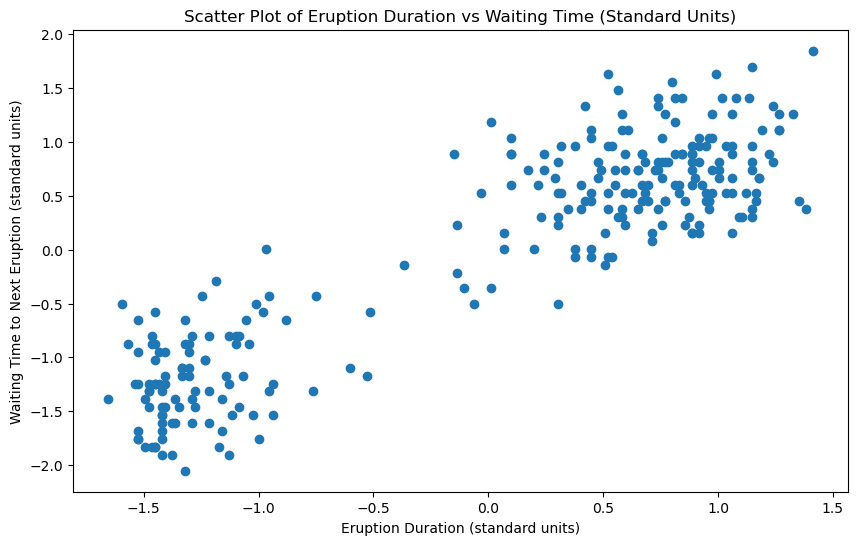

In [8]:
#GIVE YOUR ANSWER FOR TASK-5 IN THIS CELL
geyser = pd.read_csv('faithful.csv')

# eruption durations
duration_mean = geyser['duration'].mean()
duration_std = geyser['duration'].std()
geyser['duration (standard units)'] = (geyser['duration'] - duration_mean) / duration_std

#waiting times
wait_mean = geyser['wait'].mean()
wait_std = geyser['wait'].std()
geyser['wait (standard units)'] = (geyser['wait'] - wait_mean) / wait_std

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(geyser['duration (standard units)'], geyser['wait (standard units)'])

# labels and title
plt.xlabel('Eruption Duration (standard units)')
plt.ylabel('Waiting Time to Next Eruption (standard units)')
plt.title('Scatter Plot of Eruption Duration vs Waiting Time (Standard Units)')


plt.show()
